## Customer Churn Analysis and Predictive Modeling
In this project, we analyze the factors influencing customer churn and develop a predictive model to anticipate this behavior. The goal is to help companies identify the customers most likely to cancel their subscription in order to implement targeted loyalty actions.

We start with a data exploration, accompanied by visualizations to illustrate the impact of the different variables on the churn decision. Statistical tests are also performed to confirm the significance of the observed relationships.

For the development of the predictive model, we perform an analysis of the importance of the variables to identify those that most influence the customer decision. As part of the feature engineering, we select the relevant variables and make the necessary adjustments to optimize the data quality.

Using pipelines, we test several algorithms in parallel. Based on performance criteria (precision, recall, F1-score), we retain the best performing model: XGBoost. The latter is then refined to obtain the best possible version.

Finally, we evaluate the robustness of the model through several methods: ROC curve, confusion matrix, and cross-validation, thus ensuring its reliability and its ability to generalize on new data.

## Importing necessary libraries


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import scipy.stats as stats

## Data Exploration

In [98]:
data = pd.read_excel('Telco_customer_churn.xlsx')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [93]:
data.shape

(7043, 33)

In [94]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Churn Distribution

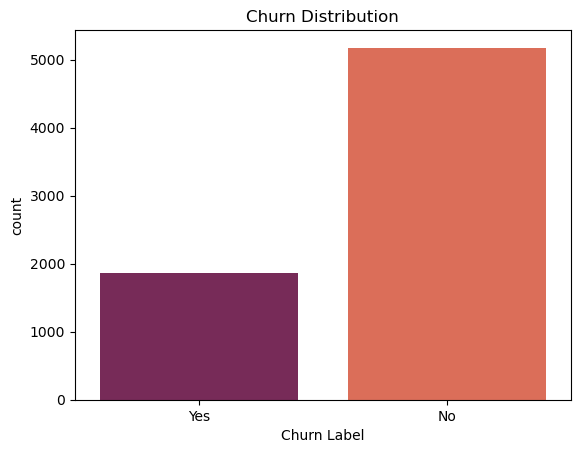

In [7]:
sns.countplot(x = data['Churn Label'], palette="rocket")
plt.title('Churn Distribution')
plt.show()

## Churn by Contract Type

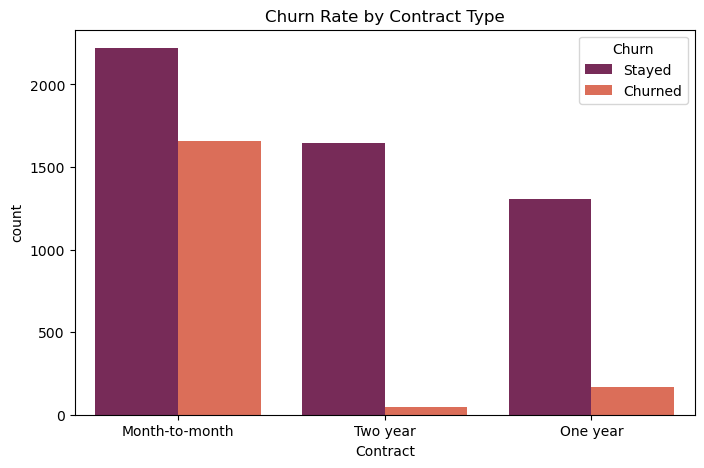

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn Value', data=data, palette='rocket')
plt.title('Churn Rate by Contract Type')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()


Customers with month-to-month contract show the highest churn rate compared to two-year and one-year contracts

In [9]:
contingency_table = pd.crosstab(data['Contract'], data['Churn Value'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic : {chi2}")
print(f"P-Value: {p}")


Chi-squared statistic : 1184.5965720837926
P-Value: 5.863038300673391e-258


The very low p-value confirms that results found above are statistically significant, and not just due to sampling error.

## Churn vs Monthly Charges

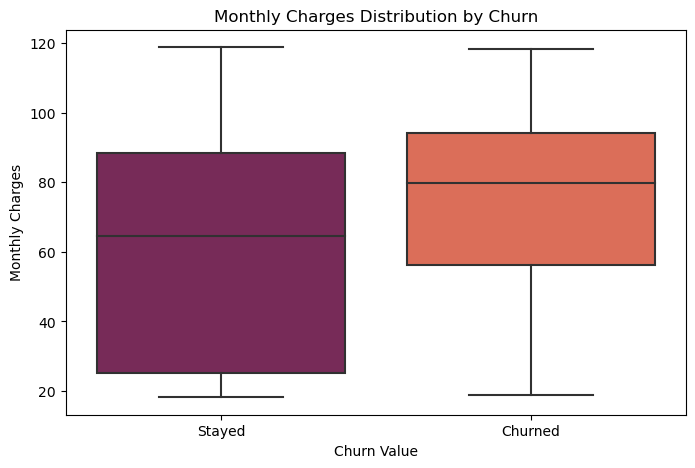

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn Value', y='Monthly Charges', data=data, palette='rocket')
plt.title('Monthly Charges Distribution by Churn')
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.show()


The visualization shows that clients with highest monthly charges are more likely to churn.

In [11]:
churned = data[data['Churn Value'] == 1]['Monthly Charges']
stayed = data[data['Churn Value'] == 0]['Monthly Charges']


t_test, p_value = ttest_ind(churned, stayed)

print(f"T-test statistic: {t_test}")
print(f"P-value: {p_value}")

T-test statistic: 16.536738015936308
P-value: 2.7066456068884154e-60


The very low p-value confirms that results found above are statistically significant, and not just due to sampling error.

## Churn vs Tenure Months

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


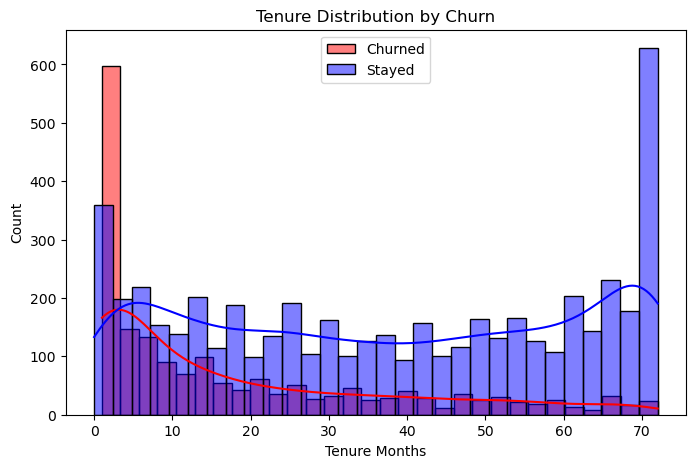

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data[data['Churn Value'] == 1]['Tenure Months'], bins=30, color='red', label='Churned', kde=True)
sns.histplot(data[data['Churn Value'] == 0]['Tenure Months'], bins=30, color='blue', label='Stayed', kde=True)
plt.title('Tenure Distribution by Churn')
plt.legend()
plt.show()


The visualization shows that clients less tenure months are more likely to churn.

In [13]:
churned = data[data['Churn Value'] == 1]['Tenure Months']
stayed = data[data['Churn Value'] == 0]['Tenure Months']


t_test, p_value = ttest_ind(churned, stayed)

print(f"T-test statistic: {t_test}")
print(f"P-value: {p_value}")

T-test statistic: -31.57955051135377
P-value: 7.99905796059022e-205


The very low p-value confirms that results found above are statistically significant, and not just due to sampling error. The negative t test statistics shows that the two variables progress in opposite directions, the more tenure months, the less churn, and vice-virsa.

## Churn vs Payment Method

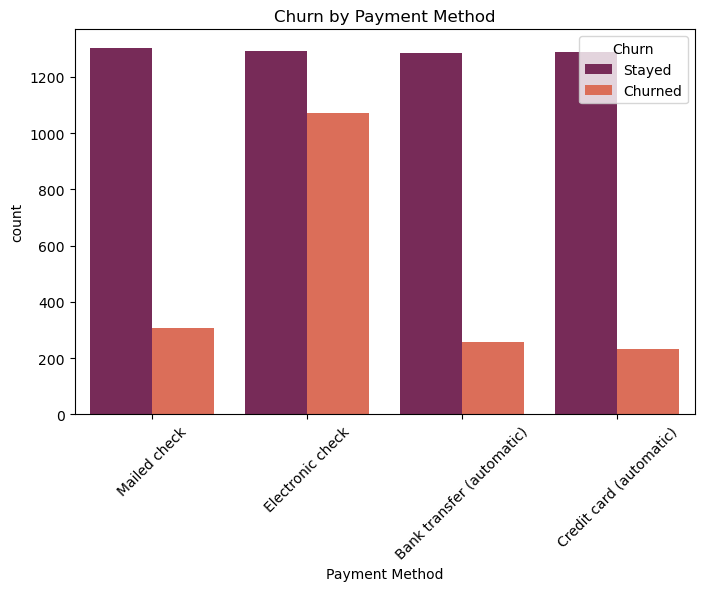

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='Payment Method', hue='Churn Value', data=data, palette='rocket')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()


Clients who use electronic check as their payment method are the most likely to canccel thier subscription.

In [15]:
contingency_table = pd.crosstab(data['Payment Method'], data['Churn Value'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(contingency_table)

print(f"Chi-squared statistic : {chi2}")
print(f"P-Value: {p}")

Churn Value                   0     1
Payment Method                       
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Chi-squared statistic : 648.1423274814
P-Value: 3.6823546520097993e-140


The very low p-value confirms that results found above are statistically significant, and not just due to sampling error. 

## CLTV vc Churn

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


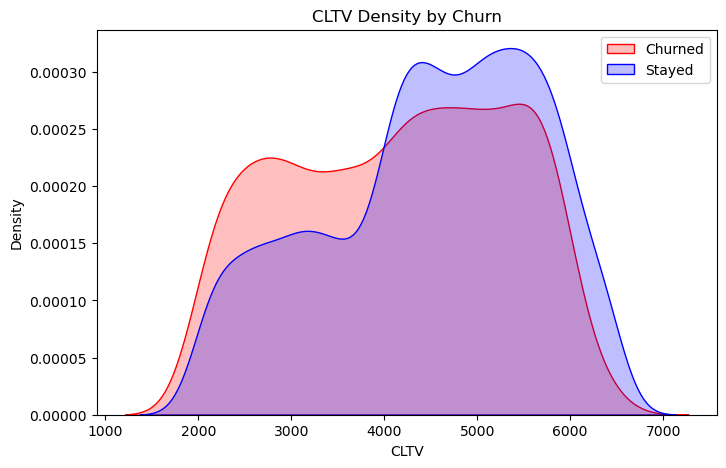

In [16]:
plt.figure(figsize=(8,5))
sns.kdeplot(data[data['Churn Value'] == 1]['CLTV'], color='red', label='Churned', fill=True)
sns.kdeplot(data[data['Churn Value'] == 0]['CLTV'], color='blue', label='Stayed', fill=True)
plt.title('CLTV Density by Churn')
plt.legend()
plt.show()


Customer with higher lifetime value are more likely to stay, while those who churn tend to have less CLTV.

In [17]:
churned = data[data['Churn Value'] == 1]['CLTV']
stayed = data[data['Churn Value'] == 0]['CLTV']


t_test, p_value = ttest_ind(churned, stayed)

print(f"T-test statistic: {t_test}")
print(f"P-value: {p_value}")

T-test statistic: -10.783471254302428
P-value: 6.679131381698727e-27


The very low p-value confirms that results found above are statistically significant, and not just due to sampling error. The negative t test statistics shows that the two variables progress in opposite directions, the higher CLTV, the less churn, and vice-virsa.

## Churn vs Gender

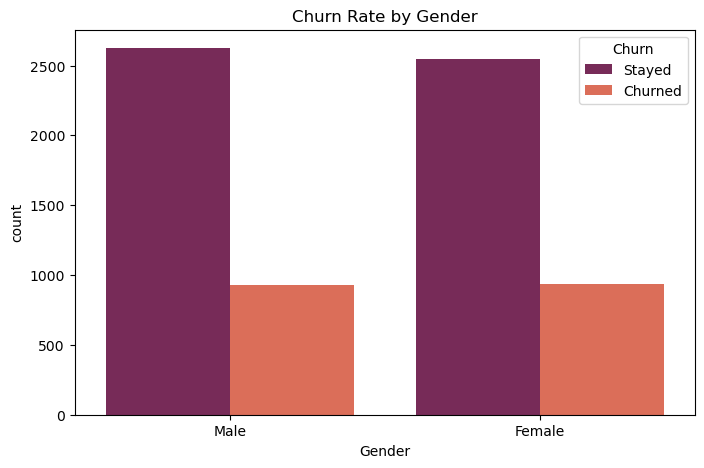

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Churn Value', data=data, palette='rocket')
plt.title('Churn Rate by Gender')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()

The visualization shows no significant difference in churn rates between males and females.

In [19]:
contingency_table = pd.crosstab(data['Gender'], data['Churn Value'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic : {chi2}")
print(f"P-Value: {p}")

Chi-squared statistic : 0.4840828822091383
P-Value: 0.48657873605618596


The high p-value confirms that this variable has no significant impact on the churn decision.

## Senior citizen 

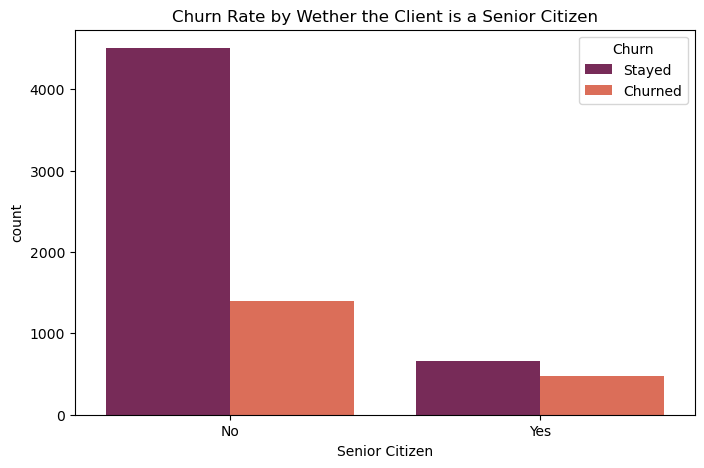

In [99]:
plt.figure(figsize=(8,5))
sns.countplot(x='Senior Citizen', hue='Churn Value', data=data, palette='rocket')
plt.title('Churn Rate by Wether the Client is a Senior Citizen')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()

In [21]:
contingency_table = pd.crosstab(data['Senior Citizen'], data['Churn Value'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic : {chi2}")
print(f"P-Value: {p}")

Chi-squared statistic : 159.42630036838742
P-Value: 1.510066805092378e-36


Senior citizens are more likely to churn.


## Partner 

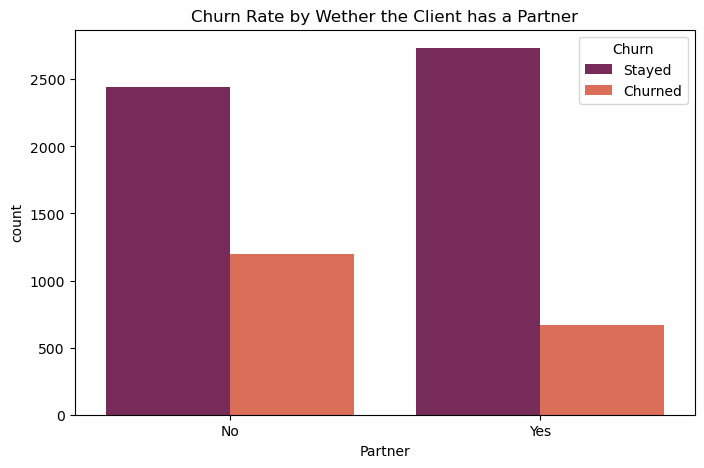

In [100]:
plt.figure(figsize=(8,5))
sns.countplot(x='Partner', hue='Churn Value', data=data, palette='rocket')
plt.title('Churn Rate by Wether the Client has a Partner')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()

In [23]:
contingency_table = pd.crosstab(data['Partner'], data['Churn Value'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic : {chi2}")
print(f"P-Value: {p}")

Chi-squared statistic : 158.7333820309922
P-Value: 2.1399113440759935e-36


Clients with partners are less likely to churn

## Dependents

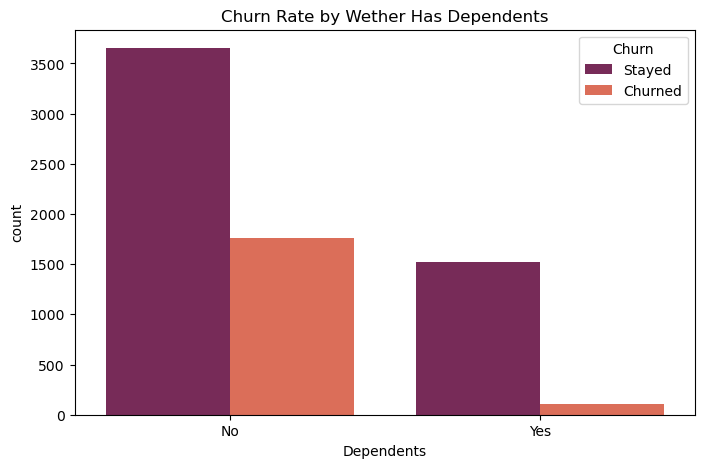

In [101]:
plt.figure(figsize=(8,5))
sns.countplot(x='Dependents', hue='Churn Value', data=data, palette='rocket')
plt.title('Churn Rate by Wether Has Dependents')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()

In [25]:
contingency_table = pd.crosstab(data['Dependents'], data['Churn Value'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic : {chi2}")
print(f"P-Value: {p}")

Chi-squared statistic : 433.7343787644573
P-Value: 2.5009723998553557e-96


Clients with dependents are less likely to churn.

## Churn by City

In [27]:
city_churn = data.groupby("City")["Churn Value"].mean().sort_values(ascending=False)
city_churn

City
Fort Jones         1.0
Eldridge           1.0
Maricopa           1.0
Boulder Creek      1.0
Riverbank          1.0
                  ... 
North Highlands    0.0
Nipton             0.0
Coleville          0.0
Newbury Park       0.0
Chester            0.0
Name: Churn Value, Length: 1129, dtype: float64

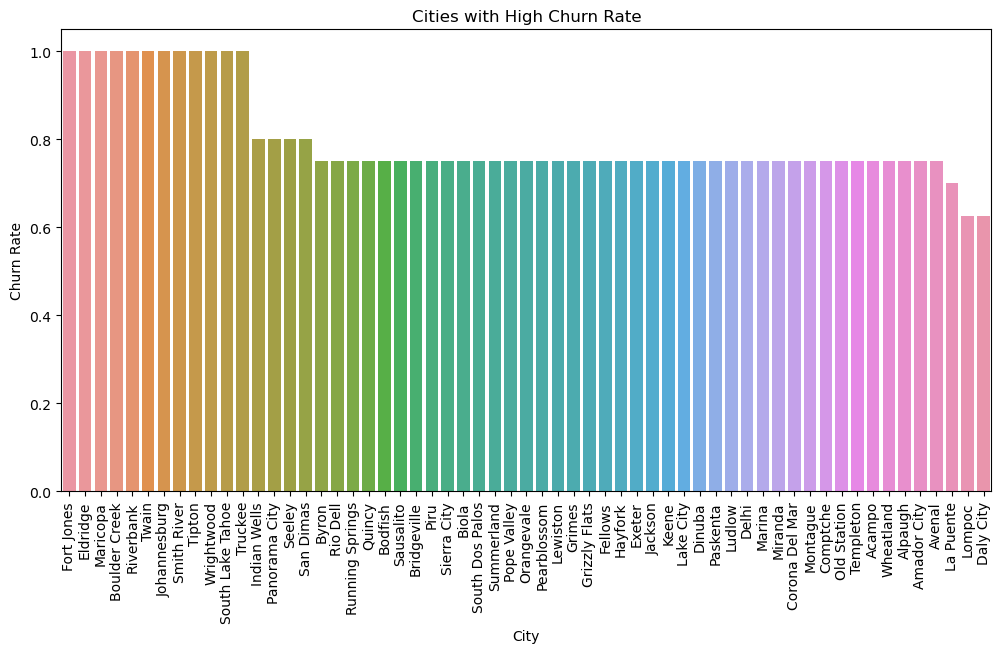

In [28]:
high_churn_cities = city_churn[city_churn > 0.6]  # Adjust the threshold as needed

plt.figure(figsize=(12, 6))
sns.barplot(x=high_churn_cities.index, y=high_churn_cities.values)
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Churn Rate")
plt.title("Cities with High Churn Rate")
plt.show()

## Feature Engineering

## Location clusters based on longitude and latitude

Since we have 1000+ cities we cannot use this variable in our model, instead we create a location cluster using longitude and latitide info.

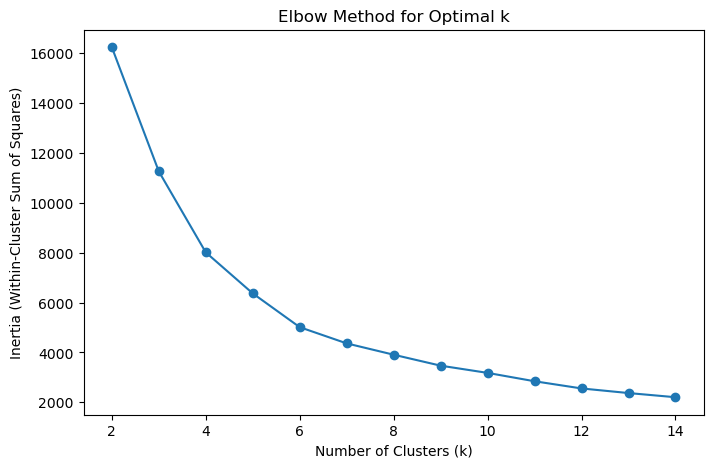

In [ ]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(2, 15) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data[["Latitude", "Longitude"]])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [30]:
# The optimal number of clusters based on the elbow method
optimal_k = 5 

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data["Location_Cluster"] = kmeans.fit_predict(data[["Latitude", "Longitude"]])


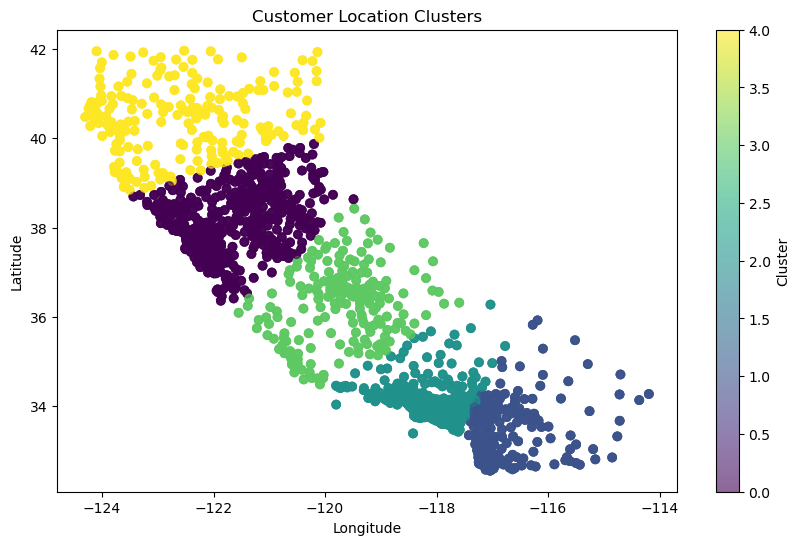

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Longitude"], data["Latitude"], c=data["Location_Cluster"], cmap="viridis", alpha=0.6)
plt.colorbar(label="Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Customer Location Clusters")
plt.show()


In [32]:
cluster_churn = data.groupby("Location_Cluster")["Churn Value"].mean()
print(cluster_churn)


Location_Cluster
0    0.273545
1    0.283811
2    0.265077
3    0.232587
4    0.252538
Name: Churn Value, dtype: float64


## Encoding categorical variables and dropping unnecessary ones

In [34]:
print(data['Phone Service'].unique())
print(data['Multiple Lines'].unique())
print(data['Internet Service'].unique())
print(data['Online Security'].unique())
print(data['Online Backup'].unique())
print(data['Device Protection'].unique())
print(data['Tech Support'].unique())
print(data['Streaming TV'].unique())
print(data['Streaming Movies'].unique())

['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [35]:
ModelData = data.drop(['Gender','Longitude', 'Latitude', 'Zip Code', 'Churn Score', 'Count', 'CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Churn Reason','Total Charges', 'Churn Label', ], axis=1)

In [36]:
ModelData['HasPartner'] = ModelData['Partner'].map({'Yes':1, 'No':0})
ModelData['HasDependents'] = ModelData['Dependents'].map({'Yes':1, 'No':0})
ModelData['IsSeniorCitizen'] = ModelData['Senior Citizen'].map({'Yes':1, 'No':0})
ModelData['HasPhoneService'] = ModelData['Phone Service'].map({'Yes':1, 'No':0})


In [37]:
ModelData= ModelData.drop(['Partner', 'Dependents', 'Senior Citizen', 'Phone Service'], axis=1)

In [38]:
ModelData.columns

Index(['Tenure Months', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Churn Value', 'CLTV',
       'Location_Cluster', 'HasPartner', 'HasDependents', 'IsSeniorCitizen',
       'HasPhoneService'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder

ordinal_cols = ModelData[['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method']]  
le = LabelEncoder()

for col in ordinal_cols:
    ModelData[col] = le.fit_transform(ModelData[col])


In [40]:
ModelData.head()

,Tenure Months,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,CLTV,Location_Cluster,HasPartner,HasDependents,IsSeniorCitizen,HasPhoneService
0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,1,3239,2,0,0,0,1
1,2,0,1,0,0,0,0,0,0,0,1,2,70.70,1,2701,2,0,1,0,1
2,8,2,1,0,0,2,0,2,2,0,1,2,99.65,1,5372,2,0,1,0,1
3,28,2,1,0,0,2,2,2,2,0,1,2,104.80,1,5003,2,1,1,0,1
4,49,2,1,0,2,2,0,2,2,0,1,0,103.70,1,5340,2,0,1,0,1


## Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separating features and target variable
X = ModelData.drop(columns=["Churn Value"]) 
y = ModelData["Churn Value"]

# Initializing and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Geting feature importance scores
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Displaying results
print(feature_importances)


              Feature  Importance
0       Tenure Months    0.176479
12    Monthly Charges    0.163330
13               CLTV    0.151123
9            Contract    0.087043
14   Location_Cluster    0.058271
11     Payment Method    0.044909
6        Tech Support    0.044835
3     Online Security    0.040514
16      HasDependents    0.036889
2    Internet Service    0.025747
15         HasPartner    0.023255
10  Paperless Billing    0.023002
4       Online Backup    0.022956
5   Device Protection    0.022223
1      Multiple Lines    0.021666
17    IsSeniorCitizen    0.019523
7        Streaming TV    0.016623
8    Streaming Movies    0.016194
18    HasPhoneService    0.005420


We select the top 10 features according to their importance 

In [42]:
ModelData = ModelData[['Tenure Months', 'Monthly Charges', 'CLTV', 'Contract', 'Location_Cluster', 'Payment Method', 'Tech Support', 'Online Security', 'HasDependents', 'Internet Service', 'Churn Value']]


## Correlation heatmap

In [43]:
corr = ModelData.corr(numeric_only=True) # data frame correlation function


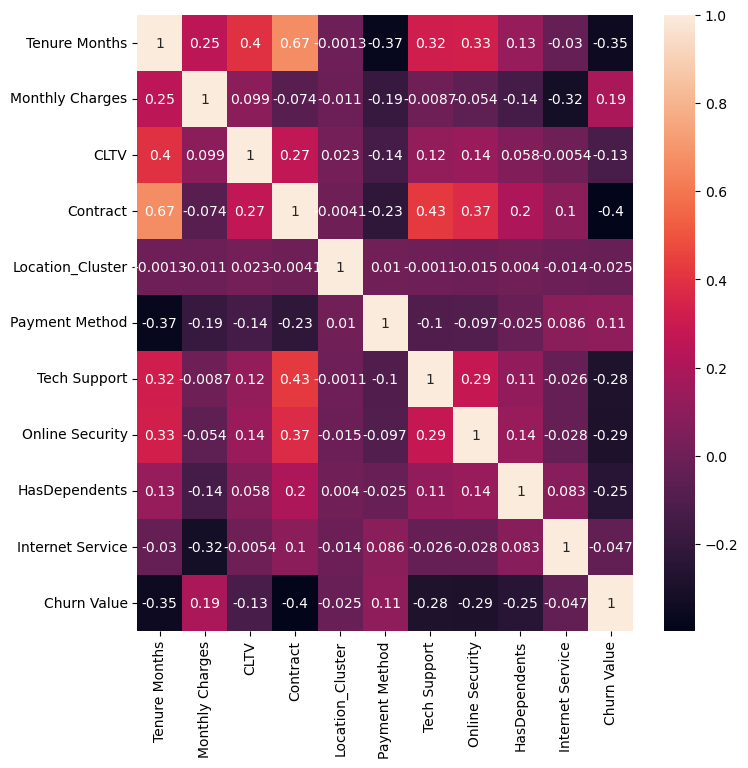

In [82]:
plt.figure(figsize = (8,8))

sns.heatmap(corr, annot=True)
plt.show()

## Modeling

In [45]:
import sklearn
from sklearn.model_selection import train_test_split

In [46]:
X = ModelData.drop('Churn Value', axis=1)
y = ModelData['Churn Value']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

We use pipline methode to test multiple models simultaneousely: Logistic Regression, Decision Tree, Random Forest, and XGBoost.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


pipeline_lr= Pipeline([('lr_classifier', LogisticRegression())])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(max_depth=None, random_state=42))]) 
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier(n_estimators=100, random_state=42))]) 
pipeline_xgb = Pipeline([('xgb_classifier', XGBClassifier(n_estimators=100, learning_rate=0.1))]) 

pipelines = [pipeline_lr,pipeline_dt, pipeline_rf, pipeline_xgb]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'XGBOOST'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

for i,model in enumerate(pipelines):
    pred_test = model.predict(X_test)
    if i == 1: rf_model = model
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))
    print(pd.DataFrame({'Actual': y_test, 'Predicted': pred_test}))
    print("Classification Report:")
    print(classification_report(y_test, pred_test))

c:\Users\hp\anaconda3\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Test Accuracy:0.7856128726928537
      Actual  Predicted
185        1          1
2715       0          0
3825       0          0
1807       1          1
132        1          0
...      ...        ...
5522       0          0
6377       0          0
5500       0          0
2392       0          0
6705       0          0

[2113 rows x 2 columns]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1525
           1       0.63      0.56      0.59       588

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.78      0.79      0.78      2113

Decision Tree Test Accuracy:0.7132039753904401
      Actual  Predicted
185        1          0
2715       0          0
3825       0          0
1807       1          1
132        1          0
...      ...        ...
5522       0          0
6377       0          0
5500       0         

Among the four models we tested, the XGBoost seems to be the optimal one. The test accuracy, and values of the precision, recall, and f1-score show a good performance, but there is still room for improvement, we'll try to fine-tune our model and improve its performance.

Use class weights to imrove class 1 recall

In [77]:

# Calculate scale_pos_weight
class_imbalance_ratio = 1525 / 588  

xgb_model = XGBClassifier(scale_pos_weight=class_imbalance_ratio, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1525
           1       0.58      0.66      0.62       588

    accuracy                           0.77      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.78      0.77      0.78      2113



Using the XGBoost model with the scale_pos_weight method improved the recall of class 1 but dropped its precision and and the overall accuracy of the model.

Now Let's try XGBoost with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.6, random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1525
           1       0.60      0.63      0.62       588

    accuracy                           0.78      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.78      0.78      0.78      2113



We can notice a slight improvement in the model performance, but the predictions of class 1 are still weak

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

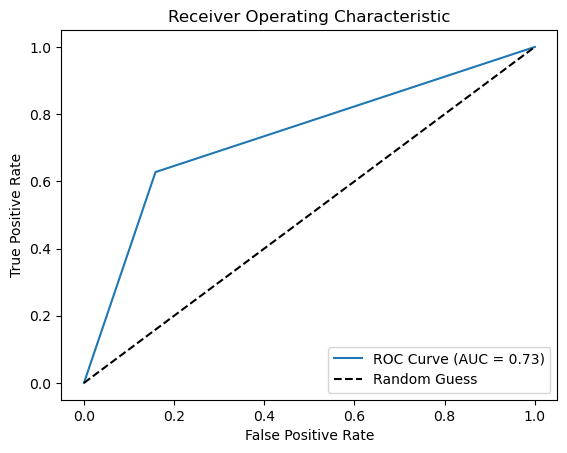

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

An AUC of 0.73 is good, it shows that the model has a fair discriminative ability between churners and non-churners. We can try to improve the model further.

Let's try SMOTE with Random Undersampling to balance the dataset more effectively:

In [79]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
smote = SMOTE(random_state = 42)
undersample = RandomUnderSampler(random_state=42)
resample_pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
X_resampled, y_resampled = resample_pipeline.fit_resample(X, y)

xgb_model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1525
           1       0.81      0.92      0.86       588

    accuracy                           0.92      2113
   macro avg       0.89      0.92      0.90      2113
weighted avg       0.92      0.92      0.92      2113



The model performance has significantly improved, an Accuracy of 0.92 and high precision, recall, and f1-score accros both classes.

## ROC Curve

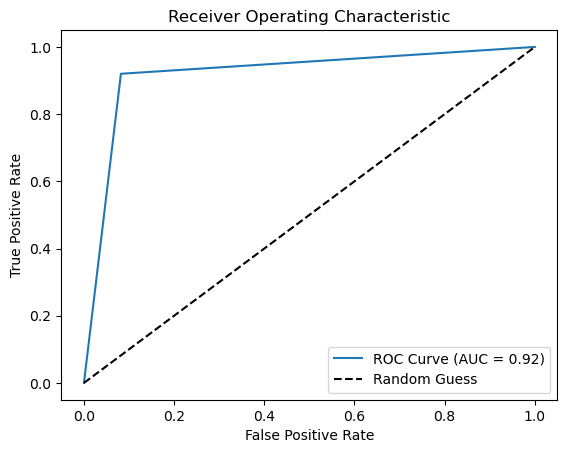

In [76]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve confirms the strong performance of our model, it shows excellent discrimination power and can effectively differentiate between churners and non-churners.

## Confusion Matrix

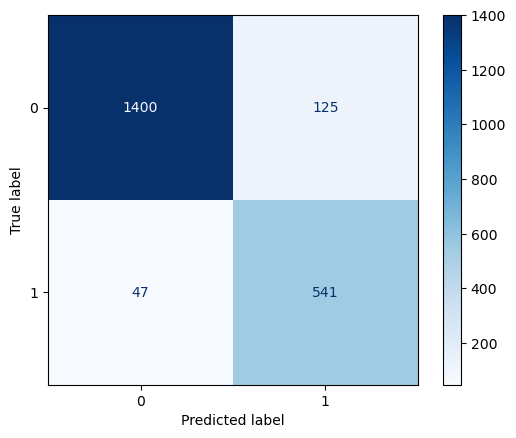

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')


Low False Negatives and high True Positives, the model does a good job at predicting both classes.

## Cross-validation

In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_resampled, y_resampled, scoring='f1', cv= 5)
print(f"Cross-Validation F1 Scores: {scores}")
print(f"Mean F1 Score: {scores.mean()}")

Cross-Validation F1 Scores: [0.84670232 0.85363636 0.84135472 0.85135135 0.84870188]
Mean F1 Score: 0.8483493272043485


. F1 scores: consistently around 0.84-0.85, meaning your model balances precision and recall well across all folds.

. Average F1 score: 0.848 is strong, showing that the model generalizes well to unseen data.

. Low variability: scores are very close to each other, indicating stability and no overfitting issues.

## Saving the model

In [95]:
import joblib
joblib.dump(xgb_model, 'xgboost_churn_model.pkl')


['xgboost_churn_model.pkl']